# 5: Analysis and Visualisation
Contributor(s): Jay Desai


## 5.2 Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from tabulate import tabulate
import statsmodels.api as sm

#### 5.2.1  Exchange Rate and International Reserve Graphs

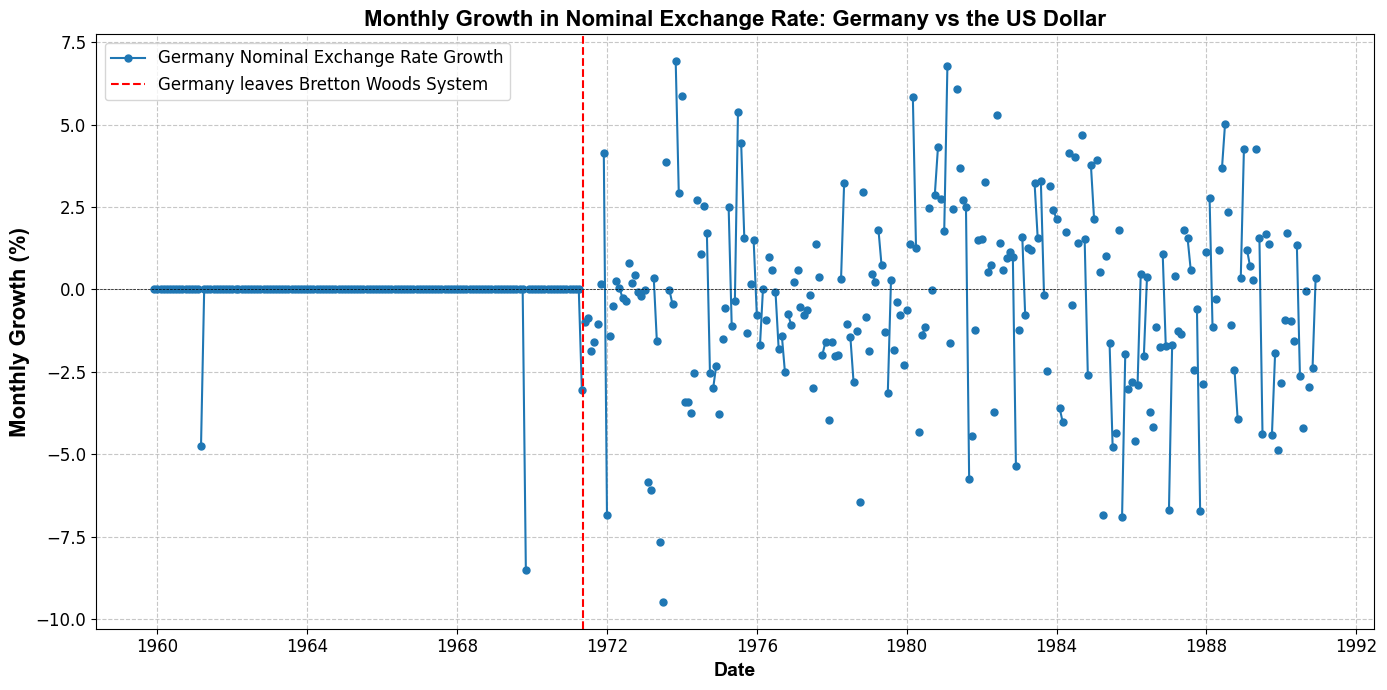

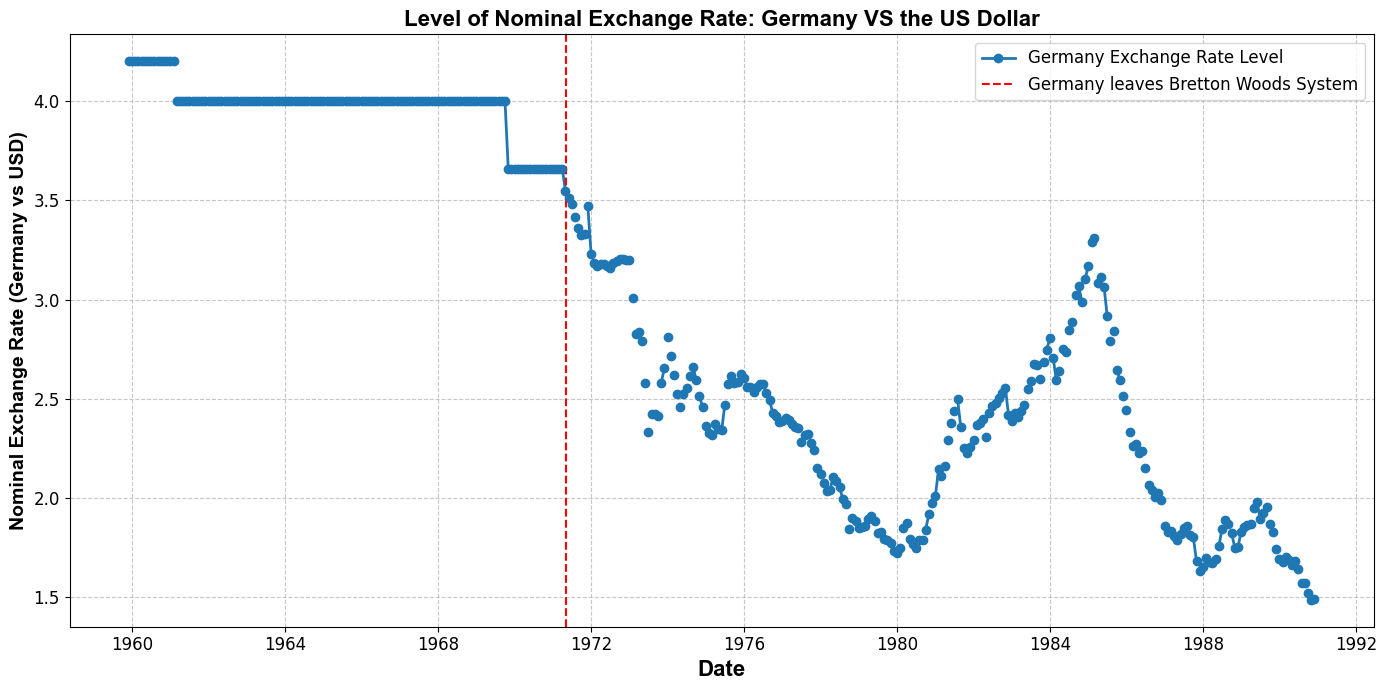

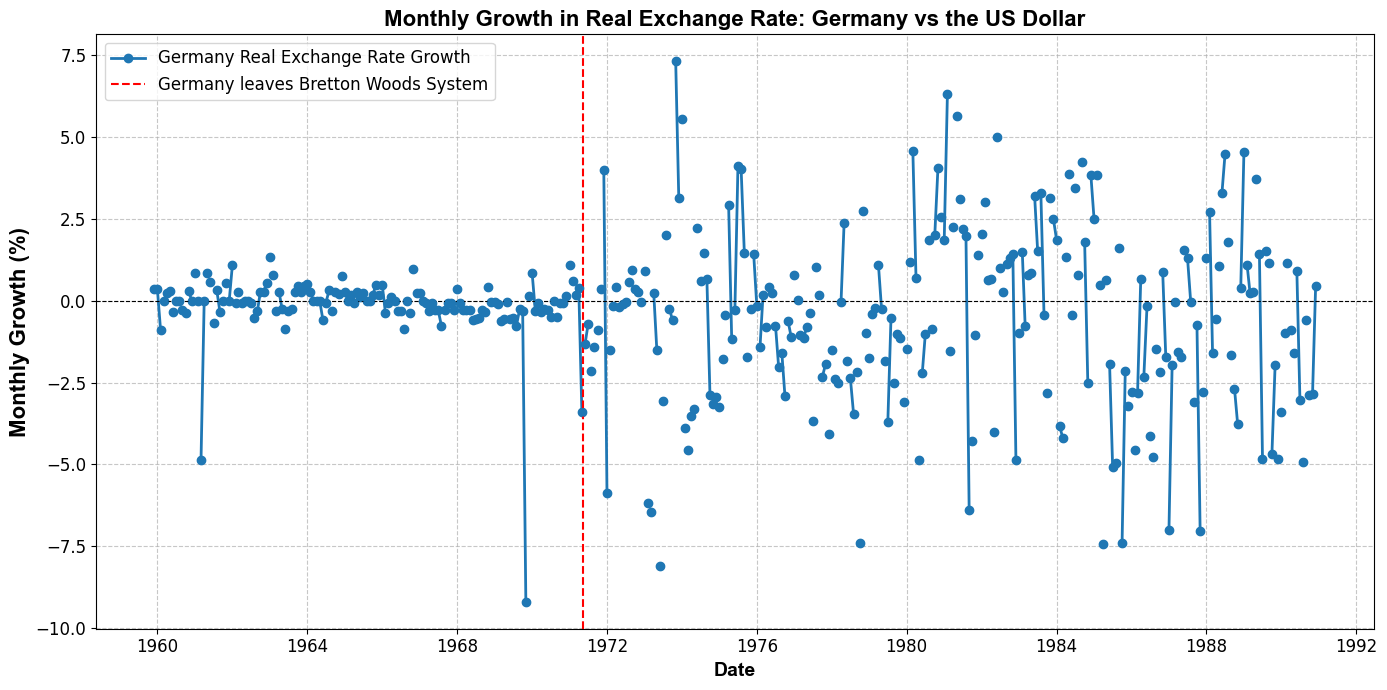

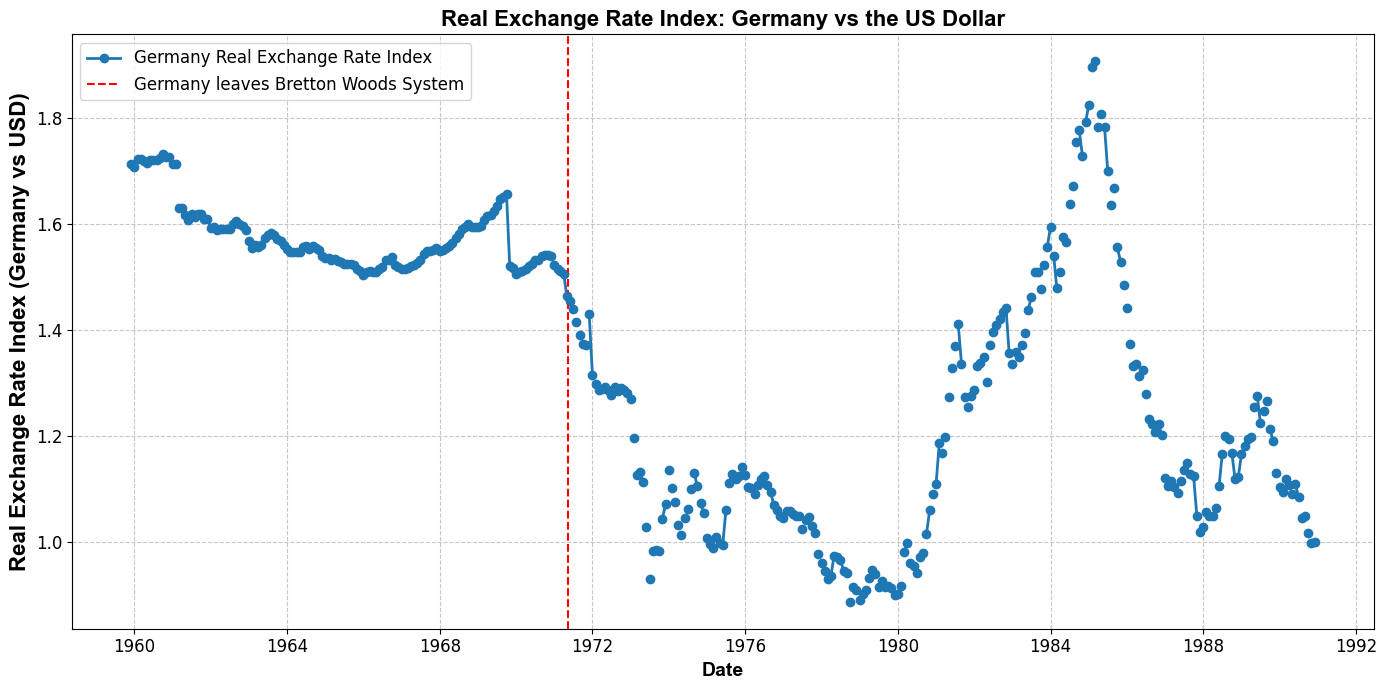

In [ ]:
# Load the data
df = pd.read_excel("../data/final_df.xlsx")

# Convert 'Time' column to datetime format
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Sort the data by Time
df = df.sort_values(by="Time")

# Graph 1: Monthly Growth in Nominal Exchange Rate
germany_growth_column = "German Nominal EX Rate Growth"
plt.figure(figsize=(14, 7))
plt.plot(df["Time"], df[germany_growth_column], label="Germany Nominal Exchange Rate Growth", marker="o", linestyle="-", color="#1f77b4", markersize=5)
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods System")
plt.xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Monthly Growth (%)", fontsize=16, fontweight='bold', family='Arial')
plt.title("Monthly Growth in Nominal Exchange Rate: Germany vs the US Dollar", fontsize=16, fontweight='bold', family='Arial')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Graph 2: Level of Nominal Exchange Rate
nominal_exchange_rate_column = "Nominal Exchange Rate"
plt.figure(figsize=(14, 7))
plt.plot(df["Time"], df[nominal_exchange_rate_column], label="Germany Exchange Rate Level", color="#1f77b4", linewidth=2, marker="o")
plt.scatter(df["Time"], df[nominal_exchange_rate_column], color="#1f77b4", s=25, zorder=5)
plt.axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods System")
plt.xlabel("Date", fontsize=16, fontweight='bold', family='Arial')
plt.ylabel("Nominal Exchange Rate (Germany vs USD)", fontsize=14, fontweight='bold', family='Arial')
plt.title("Level of Nominal Exchange Rate: Germany VS the US Dollar", fontsize=16, fontweight='bold', family='Arial')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Graph 3: Monthly Growth in Real Exchange Rate
germany_real_growth_column = "German Real EX Rate Growth"
plt.figure(figsize=(14, 7))
plt.plot(df["Time"], df[germany_real_growth_column], label="Germany Real Exchange Rate Growth", color="#1f77b4", linewidth=2 , marker="o")
plt.scatter(df["Time"], df[germany_real_growth_column], color="#1f77b4", s=25, zorder=5, marker="o")
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods System")
plt.xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Monthly Growth (%)", fontsize=16, fontweight='bold', family='Arial')
plt.title("Monthly Growth in Real Exchange Rate: Germany vs the US Dollar", fontsize=16, fontweight='bold', family='Arial')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Graph 4: Real Exchange Rate Index
real_exchange_rate_index_column = "German Real EX Rate Index"
plt.figure(figsize=(14, 7))
plt.plot(df["Time"], df[real_exchange_rate_index_column], label="Germany Real Exchange Rate Index", color="#1f77b4", linewidth=2, marker="o")
plt.scatter(df["Time"], df[real_exchange_rate_index_column], color="#1f77b4", s=25, zorder=5)
plt.axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods System")
plt.xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Real Exchange Rate Index (Germany vs USD)", fontsize=16, fontweight='bold', family='Arial')
plt.title("Real Exchange Rate Index: Germany vs the US Dollar", fontsize=16, fontweight='bold', family='Arial')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Show all plots
plt.show()


Plot time series graphs of the monthly indexed value of international reserves for your country and the US from January 1960 until the exit of the US from Bretton Woods.

- Was the US dollar over or undervalued in the Bretton Woods system? Refer to data or figures in your answer. 
- Using your above figures, explain one reason for the US’s departure from the Bretton Woods system.

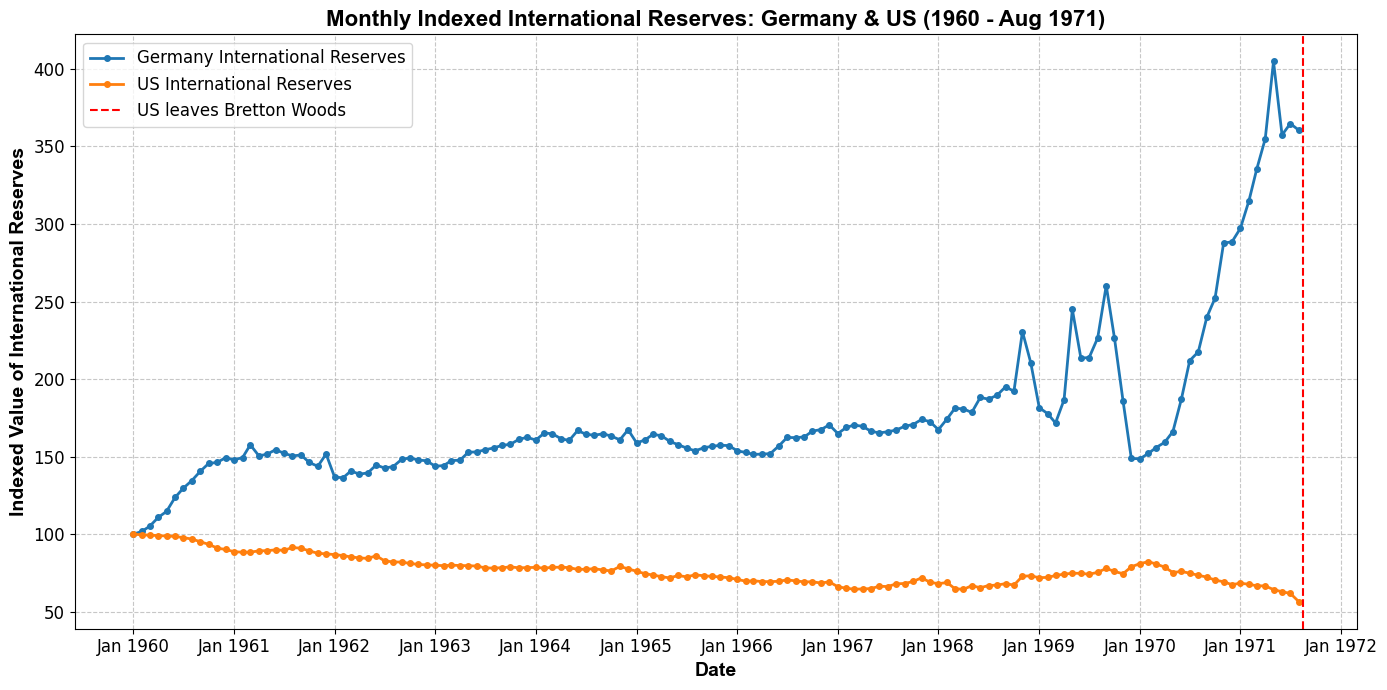

In [ ]:
df = pd.read_excel("../data/final_df.xlsx")

df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

df = df[(df["Time"] >= "1960-01-01") & (df["Time"] <= "1971-08-15")]

df["Country"] = df["Country"].str.strip()
df_germany = df[df["Country"] == "Germany"]
df_us = df[df["Country"].isin(["US", "United States", "USA"])]  # Handle variations

reserves_column = "International Reserves Index"

plt.figure(figsize=(14, 7))

# Plot Germany's indexed international reserves
if not df_germany.empty:
    plt.plot(df_germany["Time"], df_germany[reserves_column], label="Germany International Reserves",
             color="#1f77b4", linewidth=2, marker="o", markersize=4)

# Plot US indexed international reserves
if not df_us.empty:
    plt.plot(df_us["Time"], df_us[reserves_column], label="US International Reserves",
             color="#ff7f0e", linewidth=2, marker="o", markersize=4)

# Add vertical red line marking US exit from Bretton Woods (Aug 15, 1971)
plt.axvline(pd.to_datetime("1971-08-15"), color="red", linestyle="--", linewidth=1.5, label="US leaves Bretton Woods")


plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
#plt.xticks(rotation=45, ha="right")  # Rotate labels for readability

# Graph formatting
plt.xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Indexed Value of International Reserves", fontsize=14, fontweight='bold', family='Arial')
plt.title("Monthly Indexed International Reserves: Germany & US (1960 - Aug 1971)", fontsize=16, fontweight='bold', family='Arial')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout() #spacing is better with this


plt.show()


/var/folders/7g/lmj_b9394knf5s164whgfq900000gn/T/ipykernel_31603/426658555.py:60: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly_std = df_filtered.resample('Y', on='Time')[column].std()


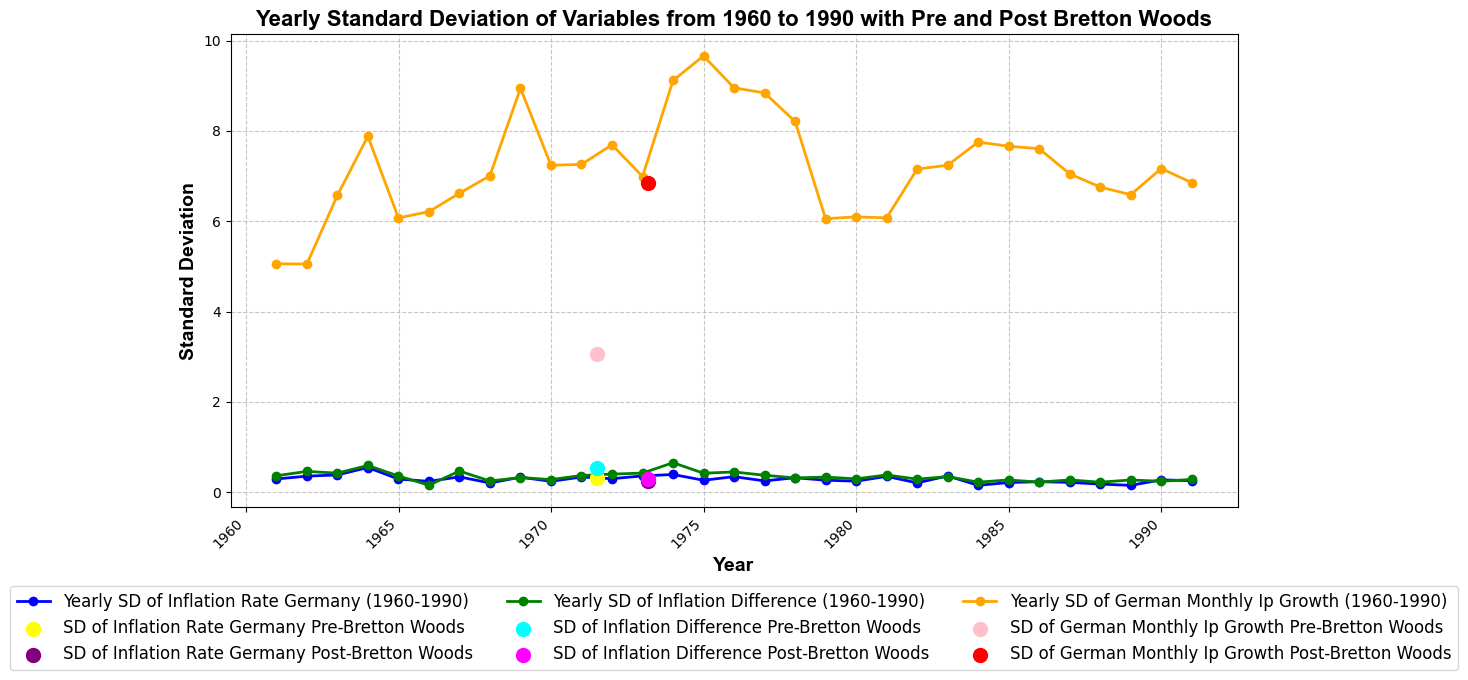


Standard Deviation Table:
                                                    Std (1960-1990)
Inflation Rate in Germany                                 0.326807
Inflation Difference (Germany vs US)                      0.409359
12-Monthly Industrial Production Growth (Germany)         7.003215


In [ ]:
# Load the data
df = pd.read_excel("../data/final_df.xlsx")

# Convert the 'Time' column to datetime format
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Strip any leading or trailing spaces from the 'Country' column
df["Country"] = df["Country"].str.strip()

# Filter the data for Germany and US
df_germany = df[df["Country"] == "Germany"]
df_us = df[df["Country"].isin(["US", "United States", "USA"])]  # Handle variations

# Calculate the Inflation Difference between Germany and the US
df_germany = df_germany.merge(df_us[["Time", "Inflation Rate"]], on="Time", suffixes=("_Germany", "_US"))
df_germany["Inflation Difference"] = df_germany["Inflation Rate_Germany"] - df_germany["Inflation Rate_US"]

# Define the start and end years for the full period (1960-1990)
start_date = pd.to_datetime("1960-01-01")
end_date = pd.to_datetime("1990-12-31")

# Define the dates for pre and post Bretton Woods
pre_bretton_woods_end = pd.to_datetime("1971-06-30")  # Pre-Bretton Woods period ends in June 1971
post_bretton_woods_start = pd.to_datetime("1973-03-01")  # Post-Bretton Woods period starts in March 1973

# Filter data for the full period (1960-1990)
df_full_period = df_germany[(df_germany["Time"] >= start_date) & (df_germany["Time"] <= end_date)]

# List of columns to calculate standard deviation
columns = [
    "Inflation Rate_Germany",           # Inflation Rate in Germany
    "Inflation Difference",            # Difference between Germany and US inflation
    "German Monthly IP Growth"         # 12-Monthly Industrial Production Growth
]

# Define colors for each variable and their pre/post SD points
colors = {
    "Inflation Rate_Germany": "blue",  # For plotting the standard deviation curve
    "Inflation Difference": "green",
    "German Monthly IP Growth": "orange"
}

# Define distinct colors for SD points (Pre and Post Bretton Woods for each variable)
pre_post_colors = {
    "Inflation Rate_Germany": {"pre": "yellow", "post": "purple"},
    "Inflation Difference": {"pre": "cyan", "post": "magenta"},
    "German Monthly IP Growth": {"pre": "pink", "post": "red"}
}

# Function to calculate yearly standard deviation for a column
def calculate_yearly_std(df, column, start_date, end_date):
    # Filter data by the specified date range
    df_filtered = df[(df["Time"] >= start_date) & (df["Time"] <= end_date)]
    
    # Group by year and calculate the standard deviation for each year
    df_yearly_std = df_filtered.resample('Y', on='Time')[column].std()

    return df_yearly_std

# Plotting
plt.figure(figsize=(14, 7))

# Loop through each column (Inflation Rate, Inflation Difference, and Industrial Production Growth)
for column in columns:
    # Calculate yearly standard deviations for the full period (1960-1990)
    yearly_std = calculate_yearly_std(df_full_period, column, start_date, end_date)
    
    # Plot yearly standard deviation for the full period
    plt.plot(yearly_std.index, yearly_std, label=f"Yearly SD of {column.replace('_', ' ').title()} (1960-1990)", color=colors[column], marker="o", markersize=6, linestyle='-', linewidth=2)

    # Calculate standard deviation for the pre-Bretton Woods period (1960-06/1971)
    pre_std = calculate_yearly_std(df_germany, column, "1960-01-01", "1971-06-30").iloc[-1]  # Take the last value in the pre period
    plt.scatter(pre_bretton_woods_end, pre_std, color=pre_post_colors[column]["pre"], s=100, label=f"SD of {column.replace('_', ' ').title()} Pre-Bretton Woods", zorder=5)

    # Calculate standard deviation for the post-Bretton Woods period (03/1973 onwards)
    post_std = calculate_yearly_std(df_germany, column, "1973-03-01", "1990-12-31").iloc[-1]  # Take the last value in the post period
    plt.scatter(post_bretton_woods_start, post_std, color=pre_post_colors[column]["post"], s=100, label=f"SD of {column.replace('_', ' ').title()} Post-Bretton Woods", zorder=5)

# Formatting the X axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Show ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Display Year only
plt.xticks(rotation=45, ha="right")  # Rotate the date labels for readability

# Labels and title
plt.xlabel("Year", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Standard Deviation", fontsize=14, fontweight='bold', family='Arial')
plt.title("Yearly Standard Deviation of Variables from 1960 to 1990 with Pre and Post Bretton Woods", fontsize=16, fontweight='bold', family='Arial')

# Grid and Legend
plt.grid(True, linestyle="--", alpha=0.7)
# Move the legend below the plot and show it in multiple columns
plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Display plot
plt.tight_layout()
plt.show()

# Standard Deviation Table (for inspection)
def calc_std_and_ratio(df, columns):
    std_values = {}
    for column in columns:
        # Check if the column exists in the DataFrame
        if column not in df.columns:
            print(f"Column {column} is missing in the data.")
            continue
        
        # Calculate standard deviation for the full period (1960-1990)
        std_value = df[column].std()
        
        # Map the columns to custom names for clarity
        column_names_map = {
            "Inflation Rate_Germany": "Inflation Rate in Germany",
            "Inflation Difference": "Inflation Difference (Germany vs US)",
            "German Monthly IP Growth": "12-Monthly Industrial Production Growth (Germany)"
        }

        custom_column_name = column_names_map.get(column, column)

        std_values[custom_column_name] = {
            'Std (1960-1990)': std_value
        }
    
    # Convert the dictionary to a DataFrame for better presentation
    std_df = pd.DataFrame(std_values).T
    return std_df

# Calculate standard deviation for the selected columns
std_table = calc_std_and_ratio(df_full_period, columns)

# Display the result in a formatted table
print("\nStandard Deviation Table:\n", std_table)


Was the US dollar over or undervalued in the Bretton Woods system? Refer to data or figures in your answer.

Using your above figures, explain one reason for the US’s departure from the Bretton Woods system.


#### 5.2.2 Inflation and Industrial Production Graphs

##### Inflation Graphs

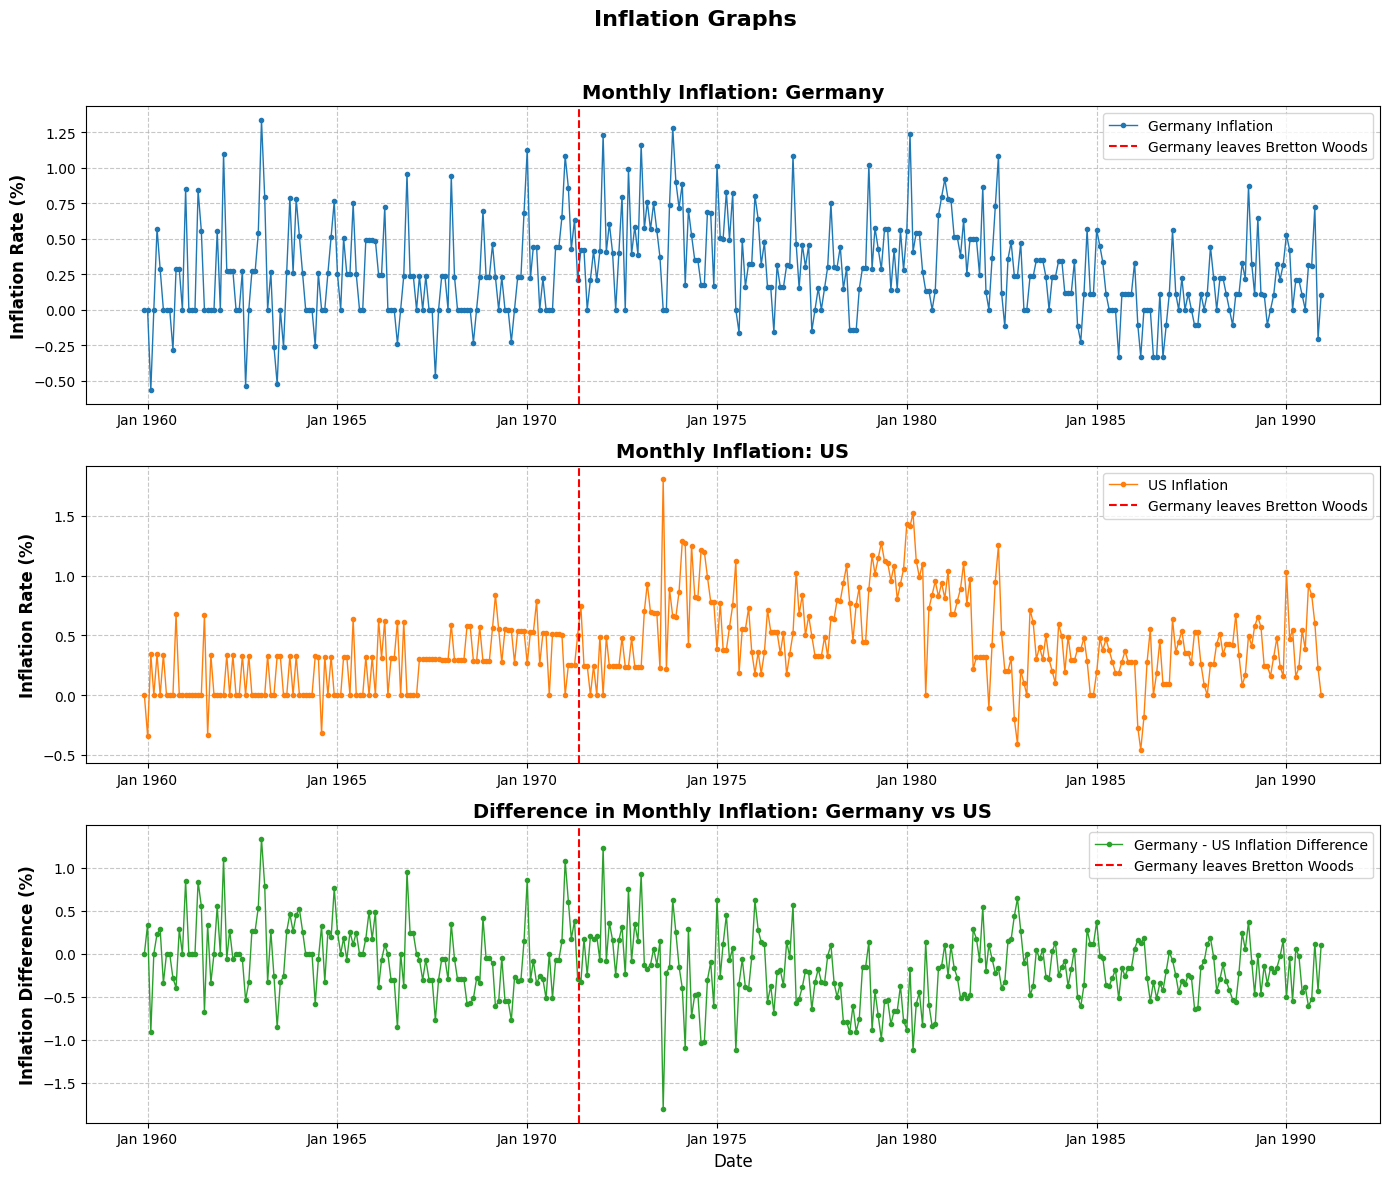

In [ ]:
# Load the data
df = pd.read_excel("../data/final_df.xlsx")

# Convert 'Time' column to datetime format
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Standardize country names if needed
df["Country"] = df["Country"].str.strip()  # Remove accidental spaces

# Filter out the data for Germany and US
df_germany = df[df["Country"] == "Germany"]
df_us = df[df["Country"].isin(["US", "United States", "USA"])]  # Handle alternative labels

# Define the column for monthly inflation
inflation_column = "Inflation Rate"

# Create the figure and axes for the plots
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=False)

# Plot Germany's monthly inflation
axs[0].plot(df_germany["Time"], df_germany[inflation_column], label="Germany Inflation", color="#1f77b4", linewidth=1, marker="o", markersize=3)
axs[0].axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods")
axs[0].set_ylabel("Inflation Rate (%)", fontsize=12, fontweight='bold')
axs[0].set_title("Monthly Inflation: Germany", fontsize=14, fontweight='bold')
axs[0].grid(True, linestyle="--", alpha=0.7)
axs[0].legend(loc='upper right', fontsize=10)

# Plot US's monthly inflation
axs[1].plot(df_us["Time"], df_us[inflation_column], label="US Inflation", color="#ff7f0e", linewidth=1, marker="o", markersize=3)  # Changed marker
axs[1].axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods")
axs[1].set_ylabel("Inflation Rate (%)", fontsize=12, fontweight='bold')
axs[1].set_title("Monthly Inflation: US", fontsize=14, fontweight='bold')
axs[1].grid(True, linestyle="--", alpha=0.7)
axs[1].legend(loc='upper right', fontsize=10)

# Plot the difference between Germany and US inflation
df_diff_inflation = df_germany.merge(df_us, on="Time", suffixes=('_Germany', '_US'))
df_diff_inflation["Inflation Difference"] = df_diff_inflation[inflation_column + "_Germany"] - df_diff_inflation[inflation_column + "_US"]

axs[2].plot(df_diff_inflation["Time"], df_diff_inflation["Inflation Difference"], label="Germany - US Inflation Difference", color="#2ca02c", linewidth=1, marker="o", markersize=3)  # Changed marker
axs[2].axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods")
axs[2].set_xlabel("Date", fontsize=12)
axs[2].set_ylabel("Inflation Difference (%)", fontsize=12, fontweight='bold')
axs[2].set_title("Difference in Monthly Inflation: Germany vs US", fontsize=14, fontweight='bold')
axs[2].grid(True, linestyle="--", alpha=0.7)
axs[2].legend(loc='upper right', fontsize=10)

# Formatting x-axis for all subplots
for ax in axs:
    ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Set major ticks to show every year
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format date as 'Month Year'
    #ax.tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-tick labels for readability

# Add overall title for the inflation section
fig.suptitle("Inflation Graphs", fontsize=16, fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()


##### Industrial Production Graphs 

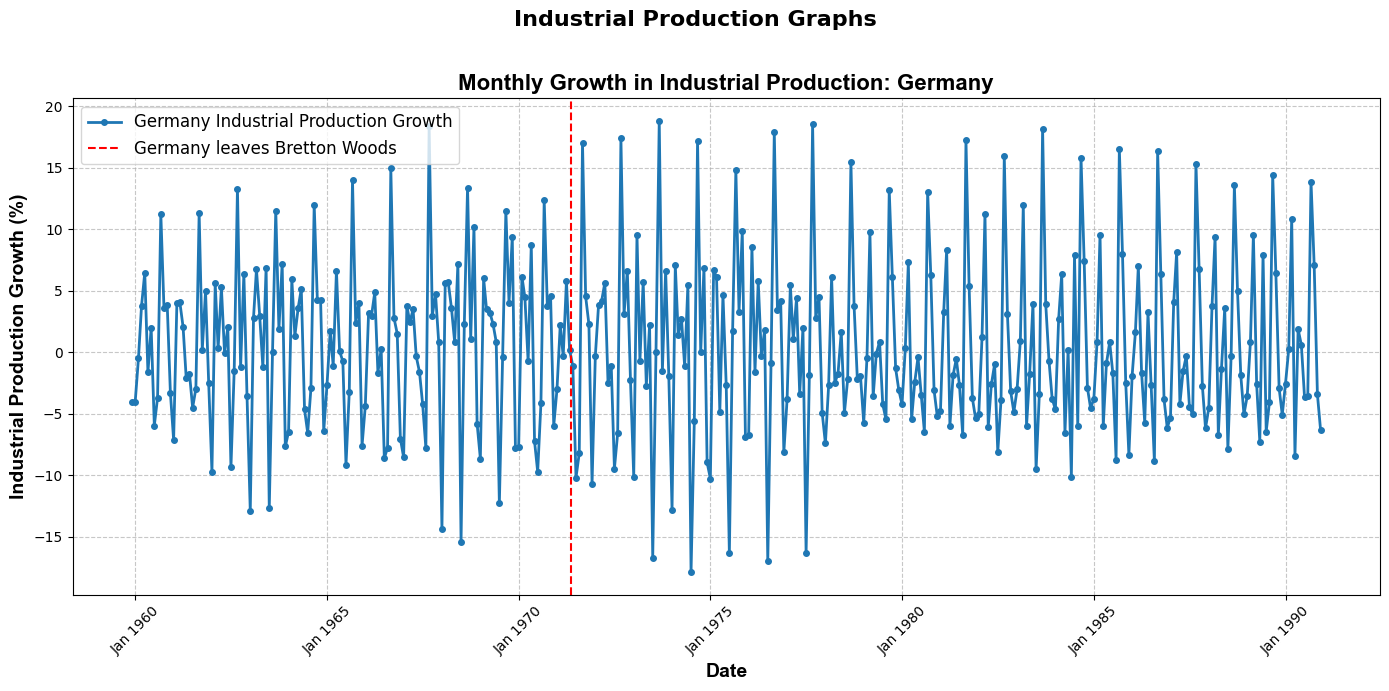

In [ ]:
# Load the data
df = pd.read_excel("../data/final_df.xlsx")

# Convert 'Time' column to datetime format
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Filter the data for Germany
df_germany = df[df["Country"] == "Germany"]

# Define the column for monthly industrial production growth
industrial_production_column = "German Monthly IP Growth"

# Create the figure and axis for the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot Germany's industrial production growth
ax.plot(df_germany["Time"], df_germany[industrial_production_column], label="Germany Industrial Production Growth", color="#1f77b4", linewidth=2, marker="o", markersize=4)

# Add vertical red line marking Germany's exit from Bretton Woods (May 1971)
ax.axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods")

# Set labels and title
ax.set_xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
ax.set_ylabel("Industrial Production Growth (%)", fontsize=14, fontweight='bold', family='Arial')
ax.set_title("Monthly Growth in Industrial Production: Germany", fontsize=16, fontweight='bold', family='Arial')

# Grid and legend
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(fontsize=12, loc='upper left')

# Set x-axis to show yearly ticks, format the dates
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.tick_params(axis='x', rotation=45, labelsize=10)

# Add the overall title for industrial production section
fig.suptitle("Industrial Production Graphs", fontsize=16, fontweight='bold')

# Tight layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()


#### 5.2.3 Comparison Statistics & Visualisation

In [ ]:
# Load the data
df = pd.read_excel("../data/final_df.xlsx")

# Convert the 'Time' column to datetime format
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Strip any leading or trailing spaces from the 'Country' column
df["Country"] = df["Country"].str.strip()

# Filter the data for Germany and US
df_germany = df[df["Country"] == "Germany"]
df_us = df[df["Country"].isin(["US", "United States", "USA"])]  # Handle variations

# Calculate the Inflation Difference between Germany and the US
df_germany = df_germany.merge(df_us[["Time", "Inflation Rate"]], on="Time", suffixes=("_Germany", "_US"))
df_germany["Inflation Difference"] = df_germany["Inflation Rate_Germany"] - df_germany["Inflation Rate_US"]

# Define the date of Bretton Woods exit
bretton_woods_exit = pd.to_datetime("1971-08-15")

# Define the end date for the before period and the start date for the after period
before_bretton_woods_end = pd.to_datetime("1971-06-30")  # Data up to June 1971
after_bretton_woods_start = pd.to_datetime("1973-03-01")  # Data from March 1973

# Filter data for before and after Bretton Woods for Germany
df_before_bw = df_germany[(df_germany["Time"] < bretton_woods_exit) & (df_germany["Time"] <= before_bretton_woods_end)]
df_after_bw = df_germany[(df_germany["Time"] >= after_bretton_woods_start) & (df_germany["Time"] >= bretton_woods_exit)]

# List of columns to calculate standard deviation
columns = [
    "German Nominal EX Rate Growth",   # Monthly growth of the nominal exchange rate
    "German Real EX Rate Growth",      # Monthly growth of the real exchange rate
    "Inflation Rate_Germany",                  # Inflation rate in Germany
    "Inflation Difference",            # Difference between Germany and US inflation
    "German Monthly IP Growth"         # 12-monthly industrial production growth
]

# Function to calculate standard deviation and ratio
def calc_std_and_ratio(df_before, df_after, columns):
    std_values = {}
    for column in columns:
        # Check if the column exists in the DataFrame
        if column not in df_before.columns or column not in df_after.columns:
            print(f"Column {column} is missing in the data.")
            continue
        
        # Calculate standard deviation before and after Bretton Woods
        std_before = df_before[column].std()
        std_after = df_after[column].std()

        # Calculate the ratio (avoid division by zero)
        ratio = std_before / std_after if std_after != 0 else float('inf')
        
        # Map the columns to custom names for clarity
        column_names_map = {
            "German Nominal EX Rate Growth": "Germany Monthly Nominal ER Growth vs US Dollar",
            "German Real EX Rate Growth": "Germany Monthly Real ER Growth vs US Dollar",
            "Inflation Rate": "Inflation Rate in Germany",
            "Inflation Difference": "Inflation Difference (Germany vs US)",
            "German Monthly IP Growth": "12-Monthly Industrial Production Growth (Germany)"
        }

        custom_column_name = column_names_map.get(column, column)

        std_values[custom_column_name] = {
            'Std Before Bretton Woods': std_before,
            'Std After Bretton Woods': std_after,
            'Ratio Before/After': ratio
        }
    
    # Convert the dictionary to a DataFrame for better presentation
    std_df = pd.DataFrame(std_values).T
    return std_df

# Calculate standard deviation and ratios for the selected columns
std_table = calc_std_and_ratio(df_before_bw, df_after_bw, columns)

# Display the result in a formatted table
print("\nStandard Deviation Table:\n", std_table)


Standard Deviation Table:
                                                    Std Before Bretton Woods  \
Germany Monthly Nominal ER Growth vs US Dollar                     0.864196   
Germany Monthly Real ER Growth vs US Dollar                        1.014880   
Inflation Rate_Germany                                             0.341466   
Inflation Difference (Germany vs US)                               0.413053   
12-Monthly Industrial Production Growth (Germany)                  6.422025   

                                                   Std After Bretton Woods  \
Germany Monthly Nominal ER Growth vs US Dollar                    2.879368   
Germany Monthly Real ER Growth vs US Dollar                       2.824467   
Inflation Rate_Germany                                            0.306777   
Inflation Difference (Germany vs US)                              0.367096   
12-Monthly Industrial Production Growth (Germany)                 7.239736   

                            

Why might it be a good idea to exclude data from 07/1971- 02/1973 for the above calculations?

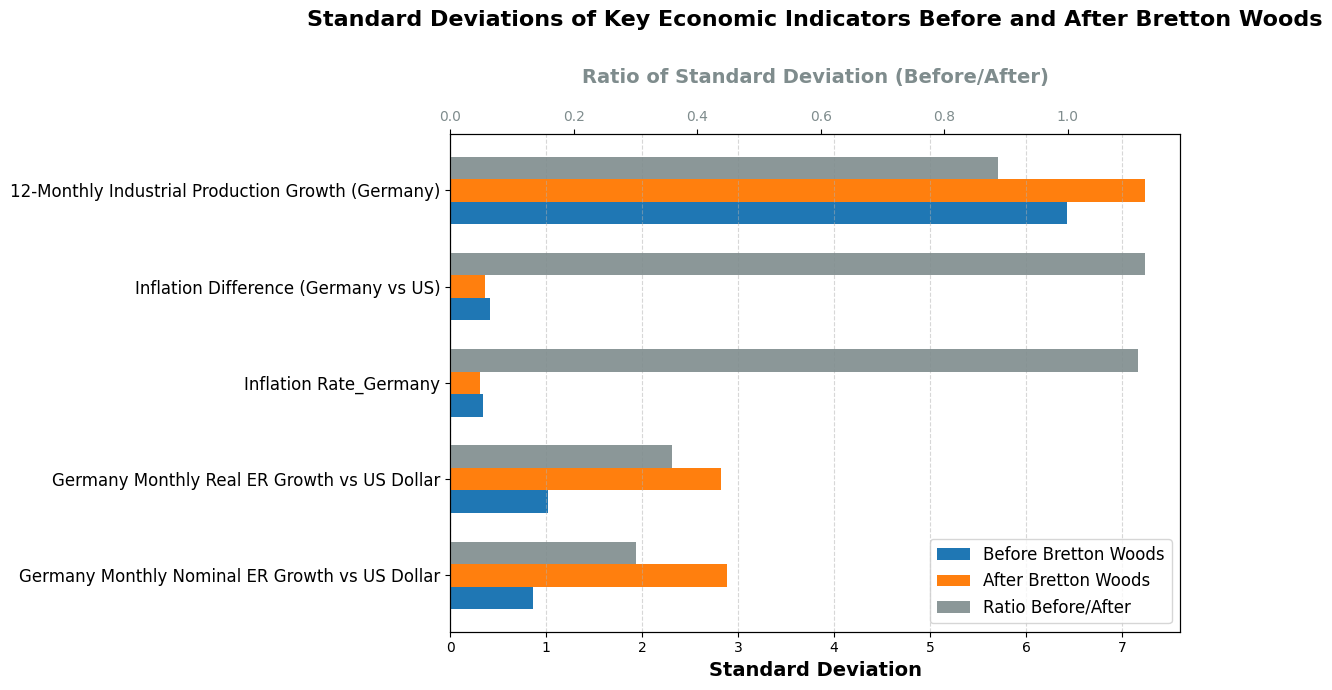

In [ ]:
# Extract values for plotting
std_before = std_table['Std Before Bretton Woods']
std_after = std_table['Std After Bretton Woods']
std_ratio = std_table['Ratio Before/After']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 7))

# Define positions for the bars
num_categories = len(std_table)


index = np.arange(num_categories) * 1.5
bar_width = 0.35  # Adjust width of bars

# Colors (blue, orange, and gray)
color_before = '#1f77b4'  
color_after = '#ff7f0e'   
color_ratio = '#7f8c8d'   

# Primary y-axis (left) - Standard deviations
bars1 = ax1.barh(index - bar_width, std_before, bar_width, label='Before Bretton Woods', color=color_before)
bars2 = ax1.barh(index, std_after, bar_width, label='After Bretton Woods', color=color_after)

# Secondary x-axis (right) - Ratio of SD before/after
ax2 = ax1.twiny()  # Create twin x-axis
bars3 = ax2.barh(index + bar_width, std_ratio, bar_width, label='Ratio Before/After', color=color_ratio, alpha=0.9)

# Labels and title
ax1.set_xlabel('Standard Deviation', fontsize=14, fontweight='bold')
ax2.set_xlabel('Ratio of Standard Deviation (Before/After)', fontsize=14, fontweight='bold', color=color_ratio, labelpad=20)
ax1.set_title('Standard Deviations of Key Economic Indicators Before and After Bretton Woods', fontsize=16, fontweight='bold', pad=30)

# Set y-axis labels
ax1.set_yticks(index)
ax1.set_yticklabels(std_table.index, fontsize=12)

# Gridlines for readability
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust x-axis colors for clarity
ax2.tick_params(axis='x', labelcolor=color_ratio)

# Legend
handles = [bars1[0], bars2[0], bars3[0]]
labels = ['Before Bretton Woods', 'After Bretton Woods', 'Ratio Before/After']
ax1.legend(handles, labels, loc='lower right', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


Ask about colours, font, need data values on bar?

In [ ]:
# Function to calculate standard deviation and ratio
def calc_std_and_ratio(df_before, df_after, columns):
    std_values = {}
    
    # Identify missing columns
    missing_before = [col for col in columns if col not in df_before.columns]
    missing_after = [col for col in columns if col not in df_after.columns]
    
    if missing_before:
        print(f"Warning: These columns are missing in the before period: {missing_before}")
    if missing_after:
        print(f"Warning: These columns are missing in the after period: {missing_after}")

    for column in columns:
        if column not in df_before.columns or column not in df_after.columns:
            continue  # Skip missing columns
        
        # Fill NaNs with 0 (optional, based on your data)
        std_before = df_before[column].dropna().std()
        std_after = df_after[column].dropna().std()

        # Compute ratio (avoid division by zero)
        ratio = std_before / std_after if std_after != 0 else float('inf')
        
        # Column name mapping for better readability
        column_names_map = {
            "German Nominal EX Rate Growth": "Germany Monthly Nominal ER Growth vs US Dollar",
            "German Real EX Rate Growth": "Germany Monthly Real ER Growth vs US Dollar",
            "Inflation Rate_Germany": "Inflation Rate in Germany",
            "Inflation Difference": "Inflation Difference (Germany vs US)",
            "German Monthly IP Growth": "12-Monthly Industrial Production Growth (Germany)"
        }

        custom_column_name = column_names_map.get(column, column)

        std_values[custom_column_name] = {
            'Std Before Bretton Woods': std_before if pd.notna(std_before) else 0,
            'Std After Bretton Woods': std_after if pd.notna(std_after) else 0,
            'Ratio Before/After': ratio if pd.notna(ratio) else 0
        }
    
    # Convert to DataFrame and ensure all rows are included
    std_df = pd.DataFrame(std_values).T

    # Fill NaNs with zeros to ensure all rows are printed
    return std_df.fillna(0)

# Run the function again
std_table = calc_std_and_ratio(df_before_bw, df_after_bw, columns)

# Print the table again
std_table_rounded = std_table.round(4)
print(tabulate(std_table_rounded, headers='keys', tablefmt='pretty'))


=== Manual Check for 1980-H1 ===
Manually computed Real EX Rate Growth std: 3.2542389109699803
Manually computed Inflation Diff std:      0.4429471221775805
Manually computed 12m IP Growth std:       3.2340308990051243

From grouped_std:
    RealEX_std  InfDiff_std  IP12m_std
41    3.254239     0.442947   3.234031

=== Regression: InfDiff_std on RealEX_std (linear) ===
                            OLS Regression Results                            
Dep. Variable:            InfDiff_std   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.2655
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.608
Time:                        19:52:27   Log-Likelihood:                 66.929
No. Observations:                  62   AIC:                            -129.9
Df Residuals:                      60   BIC:                            -12

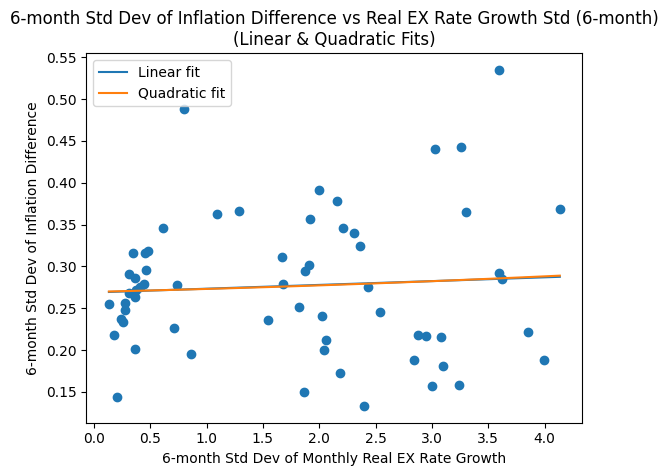

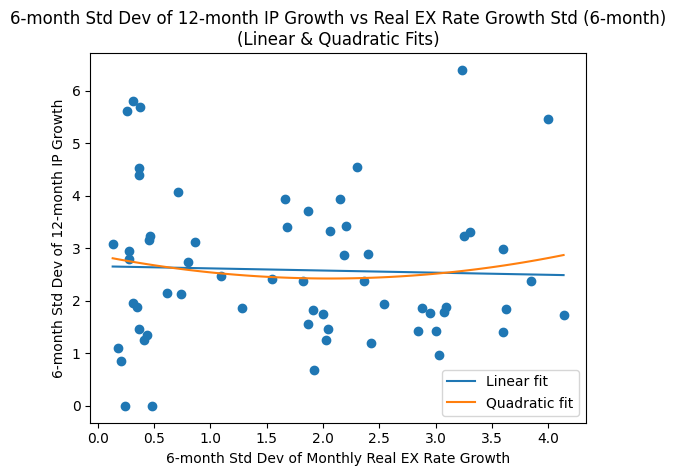

In [ ]:
df = pd.read_excel("../data/final_df.xlsx")
# -----------------------------------------------------------------------------
# 1) Assume you already have a DataFrame `df` with a monthly DateTime in df["Time"].
#    We define 'Semester' based on month (1–6 => H1, 7–12 => H2).
# -----------------------------------------------------------------------------
df["Semester"] = np.where(df["Time"].dt.month <= 6, "H1", "H2")
df["Year"] = df["Time"].dt.year
df["YearSemester"] = df["Year"].astype(str) + "-" + df["Semester"]

# -----------------------------------------------------------------------------
# 2) Create or rename columns if needed.
#    - "German Real EX Rate Growth" is used as real exchange rate growth
#    - "InflationDiff" could be the inflation difference vs the US, or a column
#      you create by subtracting US inflation from German inflation.
#    - "German Annual IP Growth" is used for the 12-month industrial production growth.
# -----------------------------------------------------------------------------
# Example: if you only have Germany’s inflation rate but you *intend* to use difference:
# df["InflationDiff"] = df["Inflation Rate"] - df["US Inflation Rate"]

# If you already have it:
df["InflationDiff"] = df["Inflation Rate"]  # adapt as needed

# -----------------------------------------------------------------------------
# 3) Group by 6‑month periods and compute the std dev for each variable.
# -----------------------------------------------------------------------------
grouped_std = (
    df.groupby("YearSemester")
      .agg({
          "German Real EX Rate Growth": "std",
          "InflationDiff": "std",
          "German Annual IP Growth": "std"
      })
      .rename(columns={
          "German Real EX Rate Growth": "RealEX_std",
          "InflationDiff": "InfDiff_std",
          "German Annual IP Growth": "IP12m_std"
      })
      .reset_index()
)

# -----------------------------------------------------------------------------
# 4) Manually confirm for a particular 6‑month period (example: 1980-H1).
#    We check a sample group from df and compare to grouped_std.
# -----------------------------------------------------------------------------
check_period = "1980-H1"  # Or pick whichever semester you want to test
subset = df[df["YearSemester"] == check_period]

print("=== Manual Check for", check_period, "===")
manual_realEX_std = subset["German Real EX Rate Growth"].std()
manual_infDiff_std = subset["InflationDiff"].std()
manual_ip12m_std   = subset["German Annual IP Growth"].std()

print("Manually computed Real EX Rate Growth std:", manual_realEX_std)
print("Manually computed Inflation Diff std:     ", manual_infDiff_std)
print("Manually computed 12m IP Growth std:      ", manual_ip12m_std)

# Now compare to grouped_std
this_row = grouped_std[grouped_std["YearSemester"] == check_period]
if not this_row.empty:
    print("\nFrom grouped_std:")
    print(this_row[["RealEX_std", "InfDiff_std", "IP12m_std"]])
else:
    print("\nNo data for", check_period, "in grouped_std.")

# -----------------------------------------------------------------------------
# 5) Regressions:
#    A) InfDiff_std on RealEX_std
#    B) IP12m_std on RealEX_std
#    We do both a linear and a quadratic regression for each.
# -----------------------------------------------------------------------------
# Drop rows where any variable is NaN (can also drop if there's only 1 data point, etc.)
clean_std = grouped_std.dropna(subset=["RealEX_std", "InfDiff_std", "IP12m_std"])

# Defensive drop of groups that have zero variance or only a single point in original:
# (strictly optional, but helps avoid zero-size array errors if data is sparse)
clean_std = clean_std[clean_std["RealEX_std"] > 0]

# 5a) Linear regression: InfDiff_std ~ RealEX_std
Y = clean_std["InfDiff_std"]
X = sm.add_constant(clean_std["RealEX_std"])
model_infdiff_linear = sm.OLS(Y, X).fit()

# 5b) Quadratic: InfDiff_std ~ RealEX_std + RealEX_std^2
X2 = pd.DataFrame({
    "const": 1.0,
    "RealEX_std": clean_std["RealEX_std"],
    "RealEX_std_sq": clean_std["RealEX_std"]**2
})
model_infdiff_quad = sm.OLS(Y, X2).fit()

print("\n=== Regression: InfDiff_std on RealEX_std (linear) ===")
print(model_infdiff_linear.summary())

print("\n=== Regression: InfDiff_std on RealEX_std (quadratic) ===")
print(model_infdiff_quad.summary())

# 5c) Linear regression: IP12m_std ~ RealEX_std
Y = clean_std["IP12m_std"]
X = sm.add_constant(clean_std["RealEX_std"])
model_ip_linear = sm.OLS(Y, X).fit()

# 5d) Quadratic: IP12m_std ~ RealEX_std + RealEX_std^2
X2 = pd.DataFrame({
    "const": 1.0,
    "RealEX_std": clean_std["RealEX_std"],
    "RealEX_std_sq": clean_std["RealEX_std"]**2
})
model_ip_quad = sm.OLS(Y, X2).fit()

print("\n=== Regression: IP12m_std on RealEX_std (linear) ===")
print(model_ip_linear.summary())

print("\n=== Regression: IP12m_std on RealEX_std (quadratic) ===")
print(model_ip_quad.summary())

# -----------------------------------------------------------------------------
# 6) Side-by-side style graphs: we make two separate plots (one for InfDiff, one for IP)
#    - x-axis: RealEX_std
#    - y-axis: InfDiff_std or IP12m_std
#    - We’ll add both the linear and second-degree line of best fit
# -----------------------------------------------------------------------------

# Build a helper function to plot scatter + linear + quadratic
def plot_with_regression(x, y, y_label):
    plt.figure()
    plt.scatter(x, y)  # scatter plot of the actual data
    
    # For the linear fit
    X_lin = sm.add_constant(x)
    lin_model = sm.OLS(y, X_lin, missing='drop').fit()
    # We’ll evaluate the regression line over a sorted domain:
    x_sorted = np.linspace(x.min(), x.max(), 100)
    X_lin_pred = sm.add_constant(x_sorted)
    y_lin_pred = lin_model.predict(X_lin_pred)
    plt.plot(x_sorted, y_lin_pred, label="Linear fit")
    
    # For the quadratic fit
    X_quad = pd.DataFrame({
        "const": 1.0,
        "x": x,
        "x2": x**2
    })
    quad_model = sm.OLS(y, X_quad, missing='drop').fit()
    x_sorted_sq = x_sorted**2
    X_quad_pred = pd.DataFrame({"const": 1.0, "x": x_sorted, "x2": x_sorted_sq})
    y_quad_pred = quad_model.predict(X_quad_pred)
    plt.plot(x_sorted, y_quad_pred, label="Quadratic fit")
    
    plt.xlabel("6-month Std Dev of Monthly Real EX Rate Growth")
    plt.ylabel(y_label)
    plt.title(f"{y_label} vs Real EX Rate Growth Std (6-month)\n(Linear & Quadratic Fits)")
    plt.legend()
    plt.show()

# Plot for Inflation Difference
plot_with_regression(
    x=clean_std["RealEX_std"], 
    y=clean_std["InfDiff_std"], 
    y_label="6-month Std Dev of Inflation Difference"
)

# Plot for 12-month IP Growth
plot_with_regression(
    x=clean_std["RealEX_std"], 
    y=clean_std["IP12m_std"], 
    y_label="6-month Std Dev of 12-month IP Growth"
)
